In [1]:
%load_ext autoreload
%autoreload 2

import helper_functions as hf
from imports import *
import importlib

num_available_cpus = multiprocessing.cpu_count()
print("Number of available CPUs:", num_available_cpus)

torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device =", device)
torch.set_default_tensor_type('torch.cuda.FloatTensor') if torch.cuda.is_available() else print ('cpu')

torch.set_num_threads(num_available_cpus)

print("Number of threads:", torch.get_num_threads())
print("Number of interop threads:", torch.get_num_interop_threads())

Number of available CPUs: 80
Device = cuda:0
Number of threads: 80
Number of interop threads: 80


/nobackup/users/sambt/anaconda3/envs/quak/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_params = {"flow_type":"NSRATQUAD","tail_bound":10,"hidden_features":120,"num_layers":6,"num_blocks_per_layer":4,
                "clip":10,"patience":20,"learning_rate":5e-5,"save_model":True,"bs":10000}
train_params["add_mjj"] = True

In [3]:
signals_UL17 = ["Qstar2000_W400_UL17","Wp3000_B400_UL17","XYY_X3000_Y80_UL17"]

106583 QCDBKG training events
106574 QCDBKG testing events
43592 XYY_X3000_Y80_UL17 training events
4844 XYY_X3000_Y80_UL17 testing events
Initial: 43592 events 
Final: 43589 events 
Removed 0.0069%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  119.53743
Loss:  73.08551
Loss:  57.186466
Loss:  48.993305
Loss:  44.300175
Loss:  41.397144
Loss:  38.43316
Loss:  35.849335
Loss:  34.208145
Loss:  32.651394
Loss:  31.742521
Loss:  30.725044
Loss:  29.949709
Loss:  29.45897
Loss:  28.361649
Loss:  28.046776
Loss:  27.22036
Loss:  27.192759
Loss:  26.402311
Iteration 20 Complete
Loss:  25.854559
SAVING MODEL
Time:  12.762641906738281
------------------------------------
Loss:  25.324623
Loss:  24.798946
Loss:  24.53741
Loss:  24.057995
Loss:  23.820812
Loss:  23.43677
Loss:  22.937902
Loss:  22.82426
Loss:  22.51368
Loss:  22.186756
Loss:  21.864
Loss:  21.392769
Loss:  21.169735
Loss:  20.775236
Loss:  20.46361
Loss:  20.297607
Loss:  20.09582
Loss

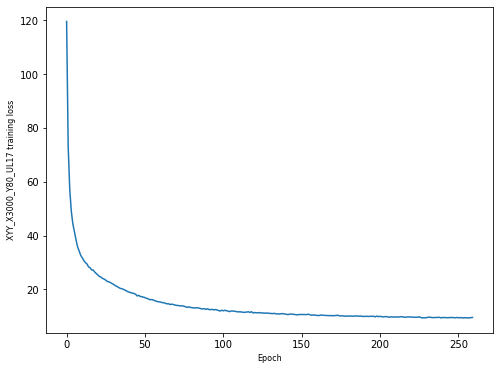

In [4]:
output = hf.train_pipeline_sig("XYY_X3000_Y80_UL17","QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10_addMjj.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]